## CAMELS US

In [1]:
from ai4water.datasets import CAMELS_US
from ai4water.utils.utils import get_version_info
from ai4water.eda import EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CAMELS_US(
    path=r"D:\data\CAMELS_US"   # set path to None if you have not already downloaded data
                    )


dataset is already downloaded at D:\data\CAMELS_US


In [4]:
dataset.start

'19800101'

In [5]:
dataset.end

'20141231'

In [6]:
stations = dataset.stations()
len(stations)

671

### Static Data

In [7]:
dataset.static_features

['p_mean',
 'pet_mean',
 'p_seasonality',
 'frac_snow',
 'aridity',
 'high_prec_freq',
 'high_prec_dur',
 'high_prec_timing',
 'low_prec_freq',
 'low_prec_dur',
 'low_prec_timing',
 'geol_1st_class',
 'glim_1st_class_frac',
 'geol_2nd_class',
 'glim_2nd_class_frac',
 'carbonate_rocks_frac',
 'geol_porostiy',
 'geol_permeability',
 'q_mean',
 'runoff_ratio',
 'slope_fdc',
 'baseflow_index',
 'stream_elas',
 'q5',
 'q95',
 'high_q_freq',
 'high_q_dur',
 'low_q_freq',
 'low_q_dur',
 'zero_q_freq',
 'hfd_mean',
 'huc_02',
 'gauge_name',
 'soil_depth_pelletier',
 'soil_depth_statsgo',
 'soil_porosity',
 'soil_conductivity',
 'max_water_content',
 'sand_frac',
 'silt_frac',
 'clay_frac',
 'water_frac',
 'organic_frac',
 'other_frac',
 'gauge_lat',
 'gauge_lon',
 'elev_mean',
 'slope_mean',
 'area_gages2',
 'area_geospa_fabric',
 'frac_forest',
 'lai_max',
 'lai_diff',
 'gvf_max',
 'gvf_diff',
 'dom_land_cover_frac',
 'dom_land_cover',
 'root_depth_50',
 'root_depth_99']

In [8]:
for feat in dataset.static_features:
    if 'lat' in feat or 'lon' in feat:
        print(feat)

gauge_lat
gauge_lon


In [9]:
q = ''
lc01 = ''
nvis = ''
anngro = ''
gromega = ''
npp = ''

In [10]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(671, 59)

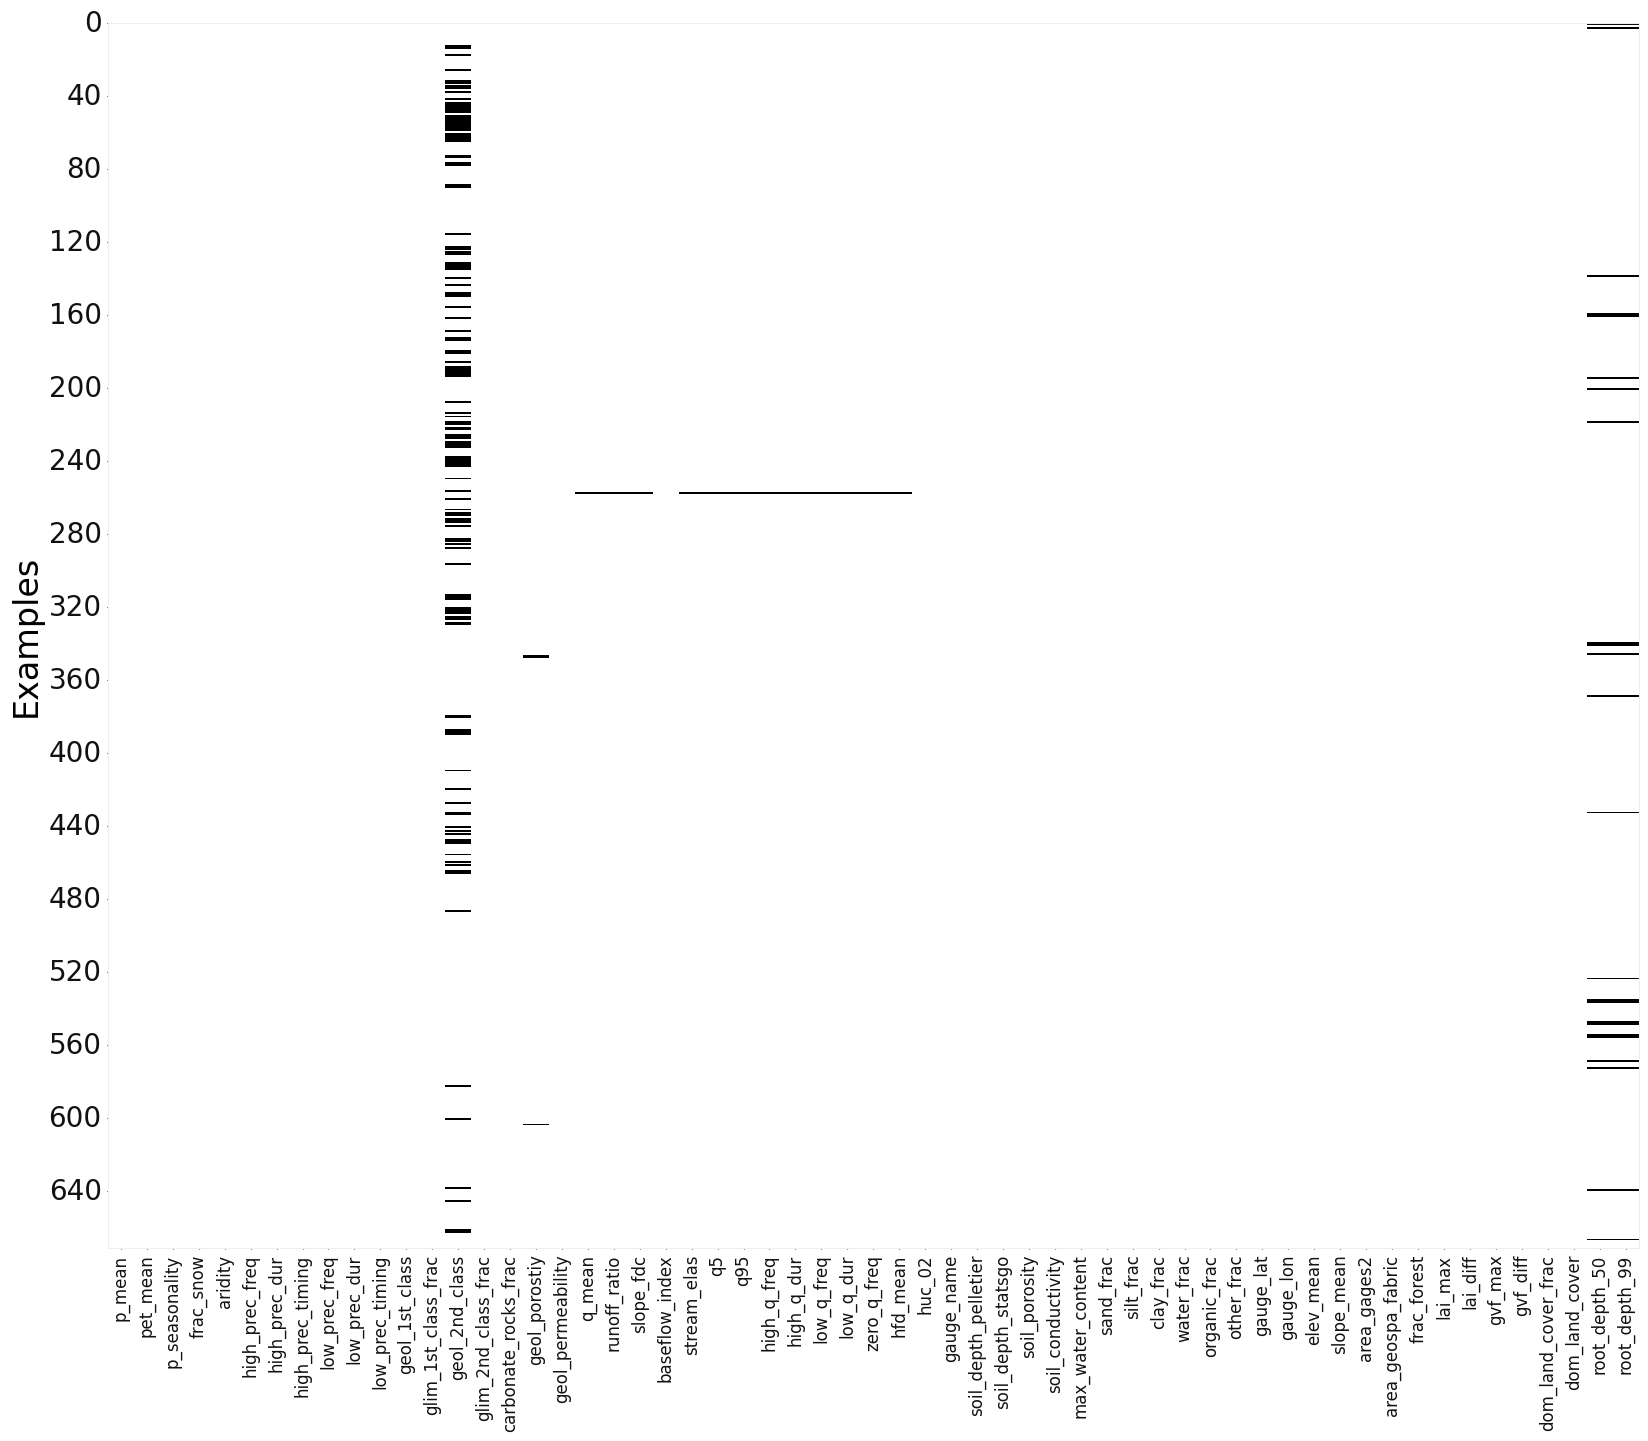

<AxesSubplot: ylabel='Examples'>

In [11]:
EDA(data=static, save=False).heatmap()

In [12]:
physical_features = []
soil_features = []
geological_features = []
# flow_characteristics = []

In [13]:
static = static.dropna(axis=1)
static.shape

(671, 43)

In [14]:
lat = static['gauge_lat'].astype(float).values.reshape(-1,)
long = static['gauge_lon'].astype(float).values.reshape(-1,)

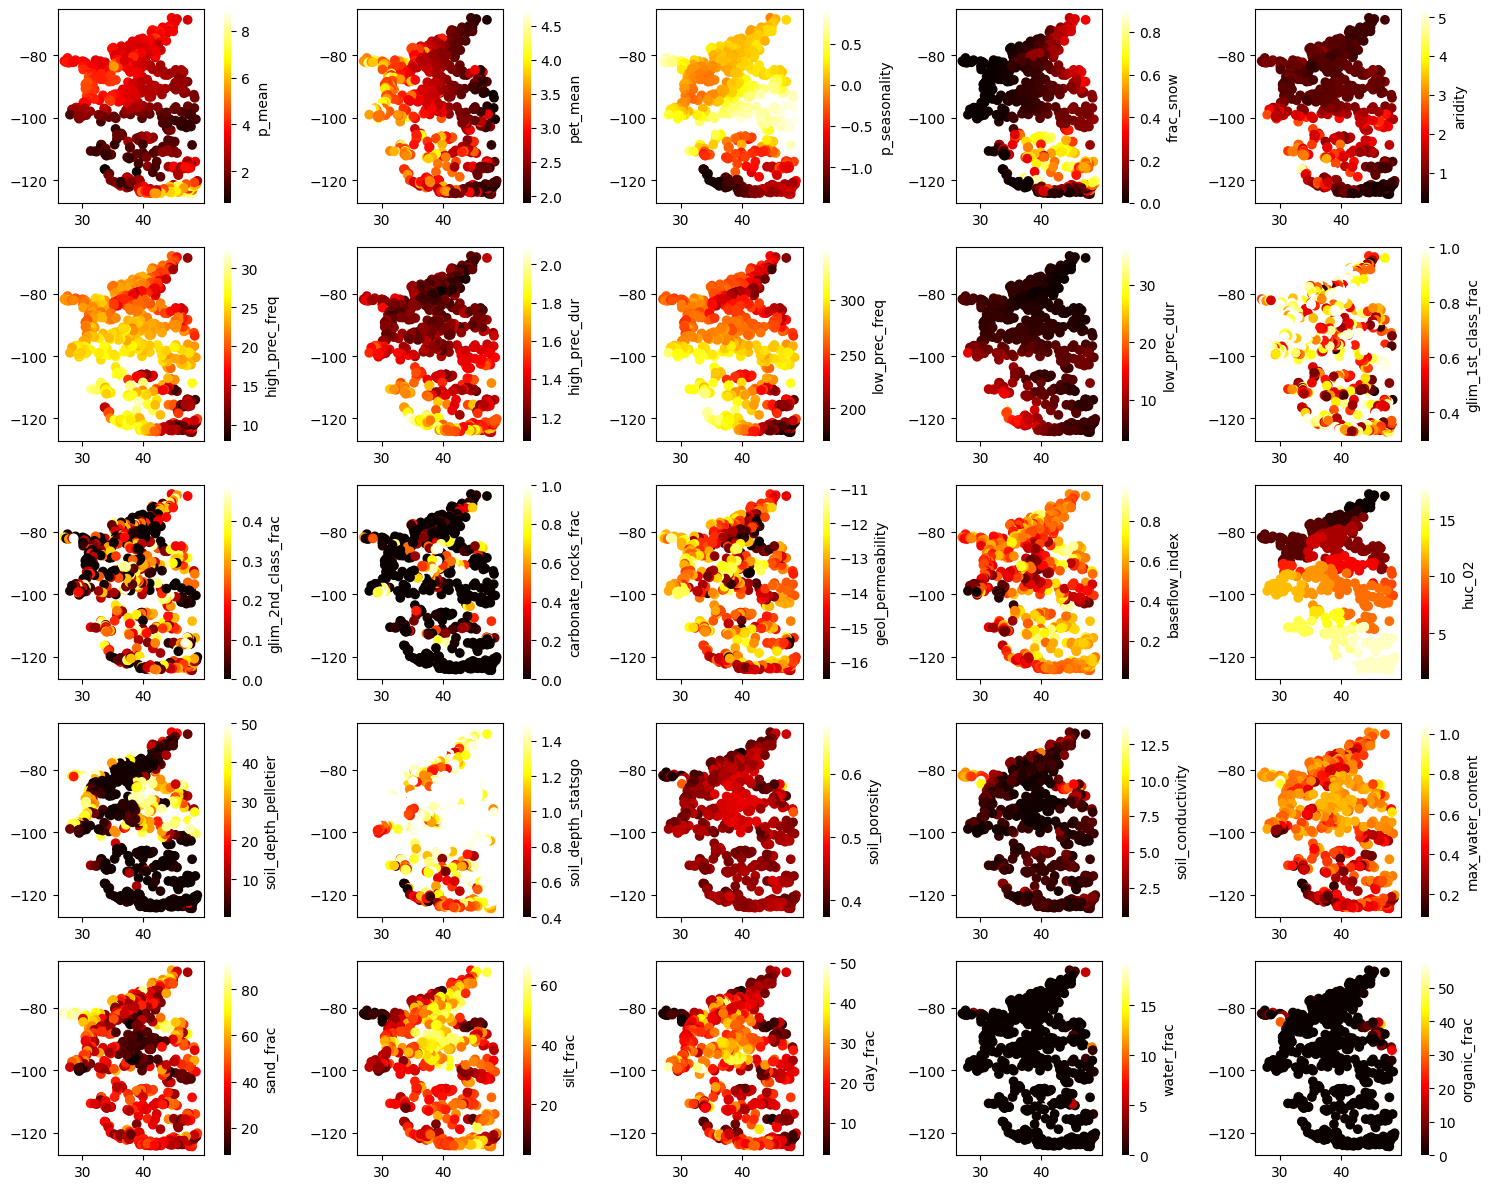

29


In [15]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(lat[0:en], long[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

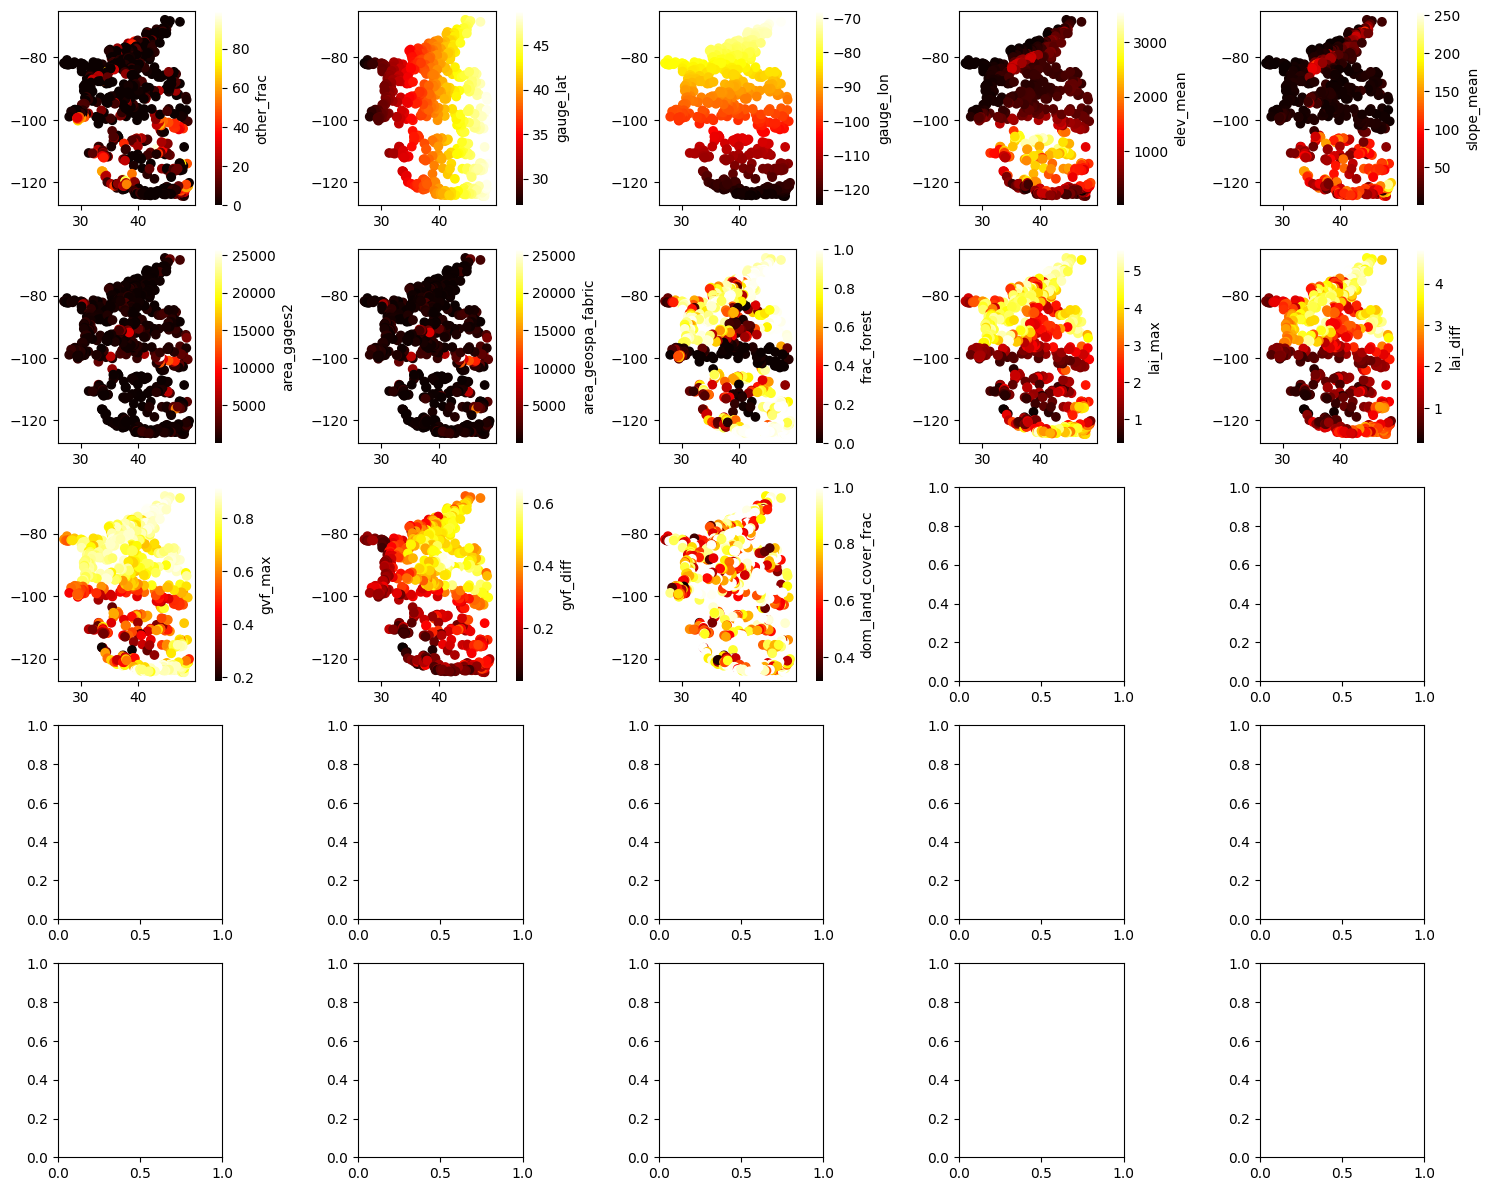

43


In [16]:
idx = 29
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(lat[0:en], long[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [17]:
dataset.dynamic_features

['dayl(s)',
 'prcp(mm/day)',
 'srad(W/m2)',
 'swe(mm)',
 'tmax(C)',
 'tmin(C)',
 'vp(Pa)',
 'Flow']

In [18]:
streamflow = dataset.fetch(dynamic_features = 'Flow', as_dataframe=True)
streamflow = streamflow.reset_index()
streamflow.index = pd.to_datetime(streamflow.pop('time'))
streamflow.pop('dynamic_features')
streamflow.shape

(12784, 671)

#### streamflow

In [20]:
EDA(data=streamflow, save=False).heatmap()

<AxesSubplot: ylabel='Examples'>

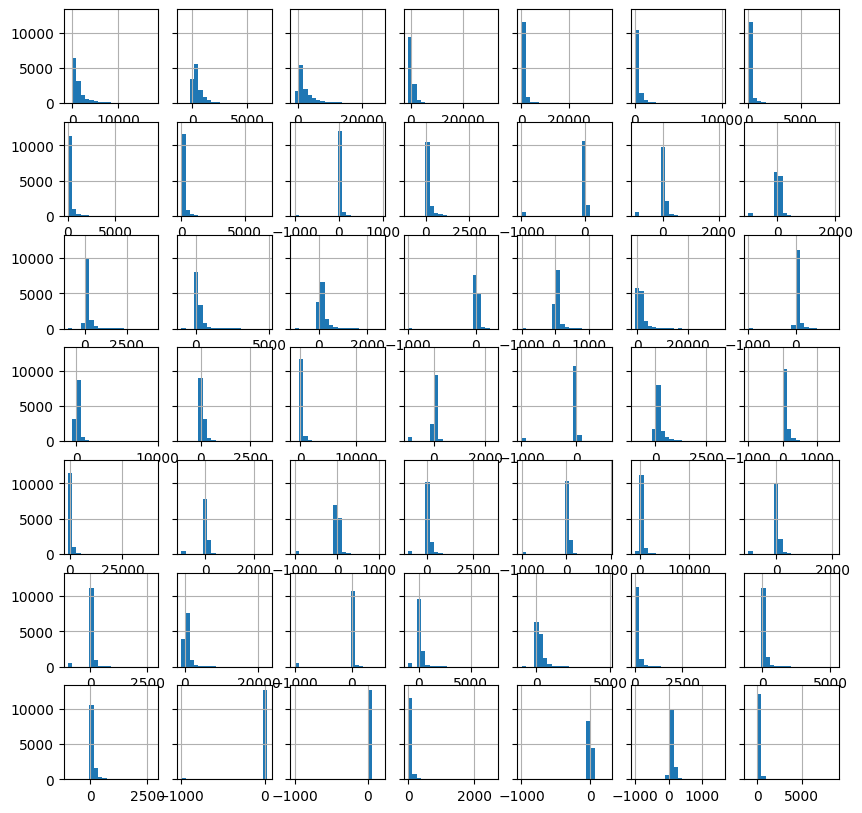

49


In [21]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

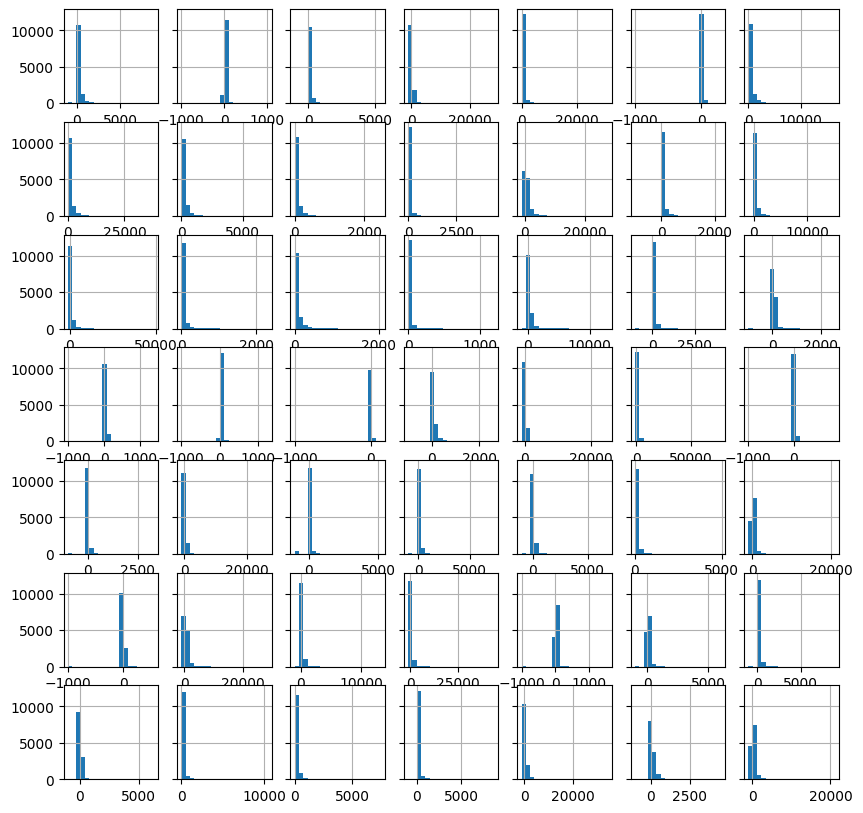

98


In [22]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

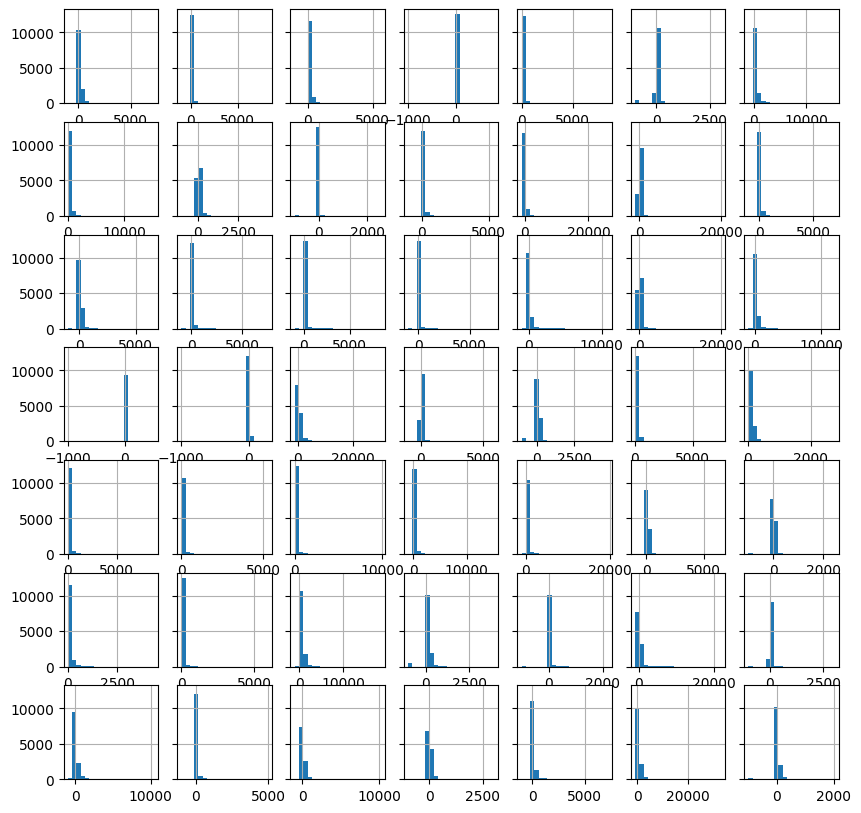

147


In [23]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

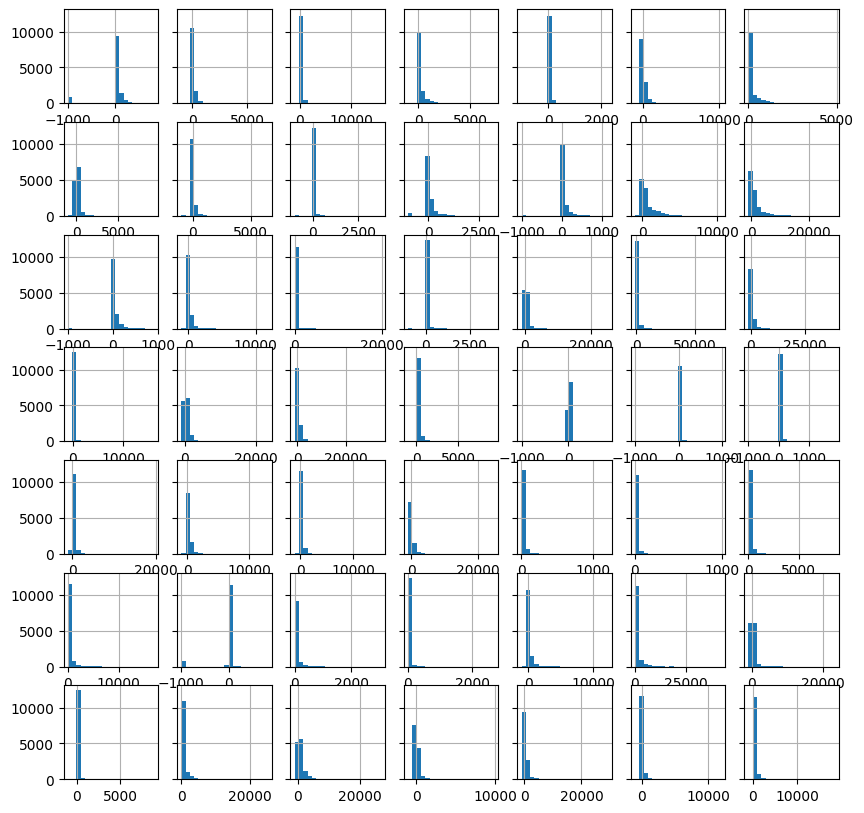

196


In [24]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

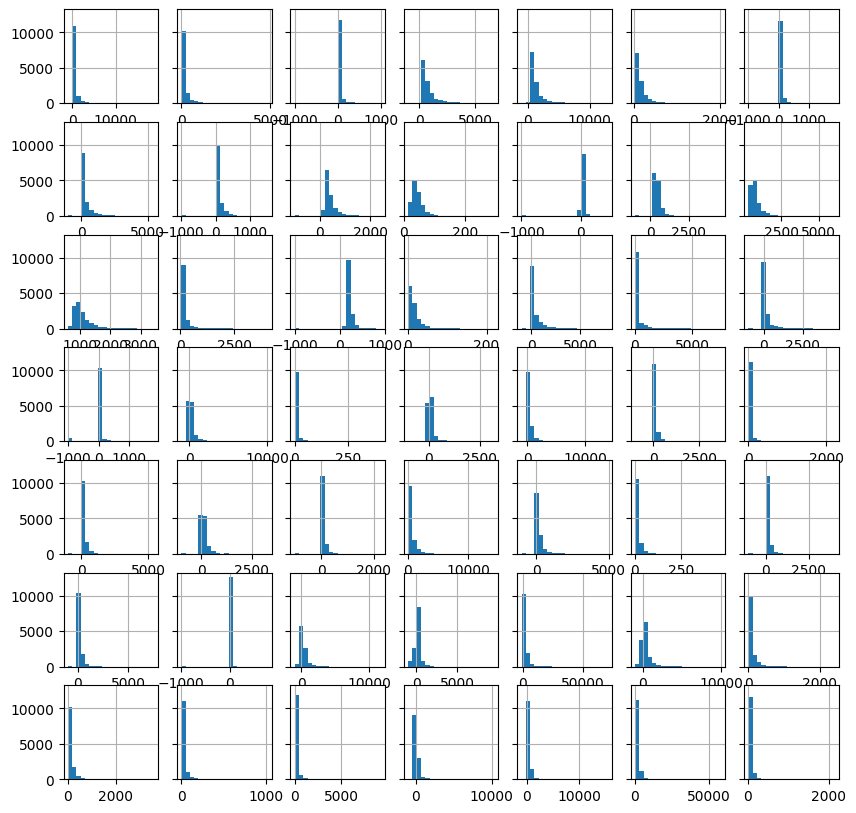

245


In [25]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

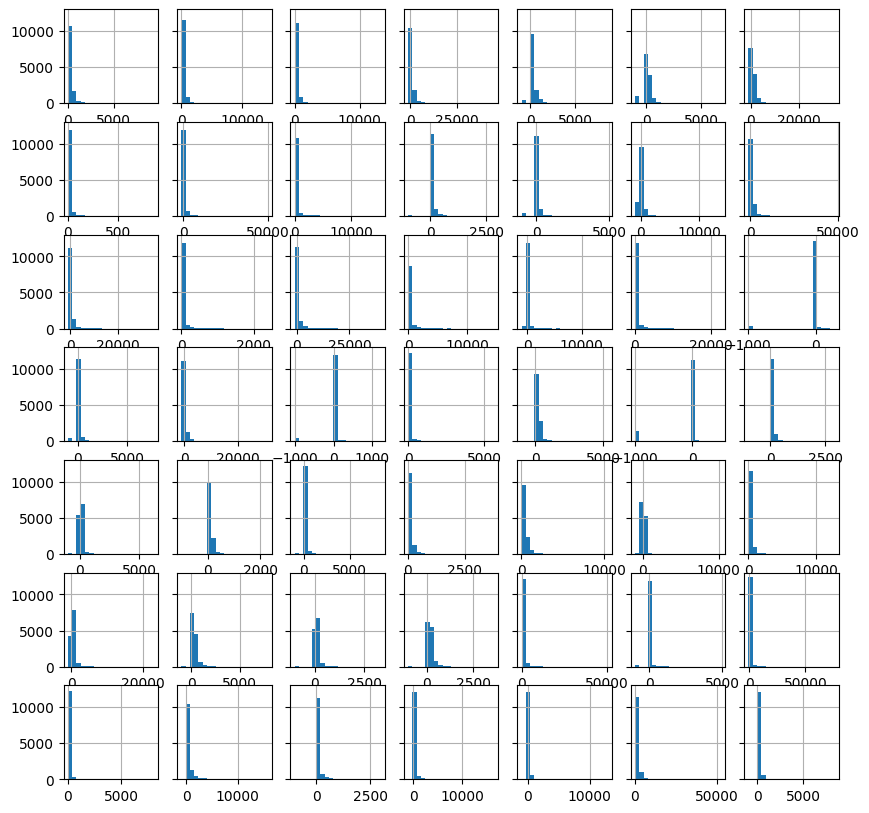

294


In [26]:
st = 245

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

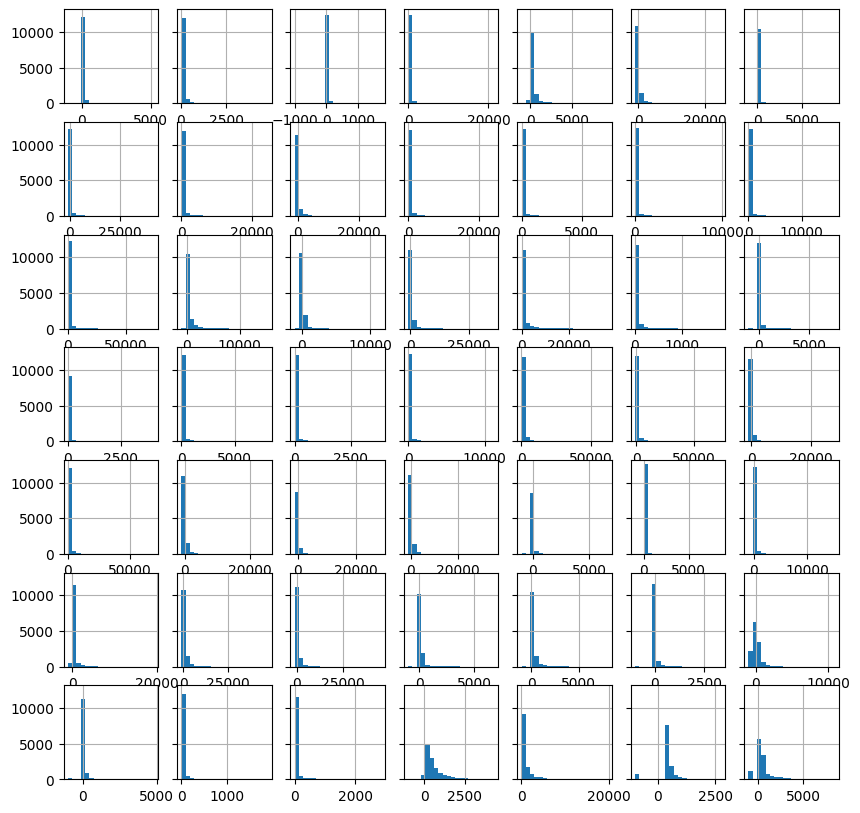

343


In [27]:
st = 294

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

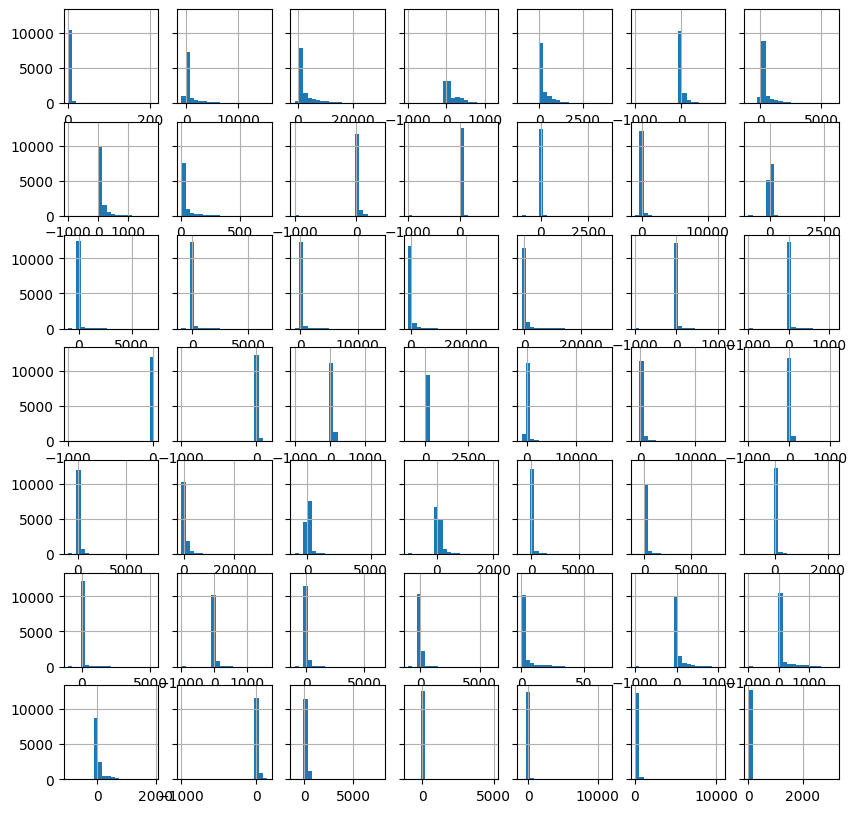

392


In [28]:
st = 343

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

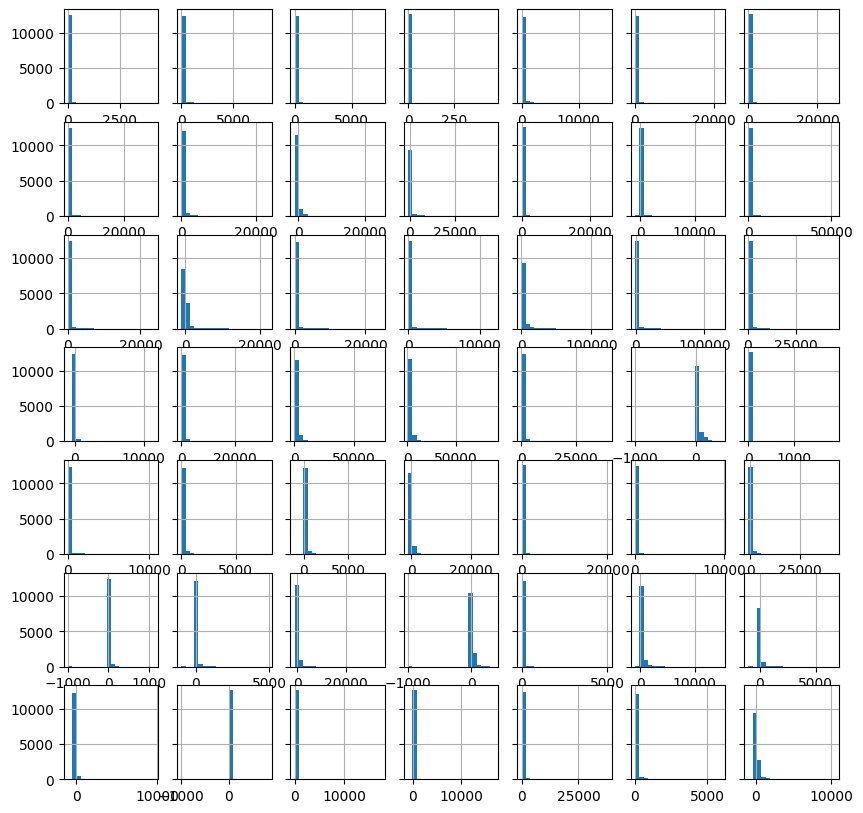

441


In [29]:
st = 392

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

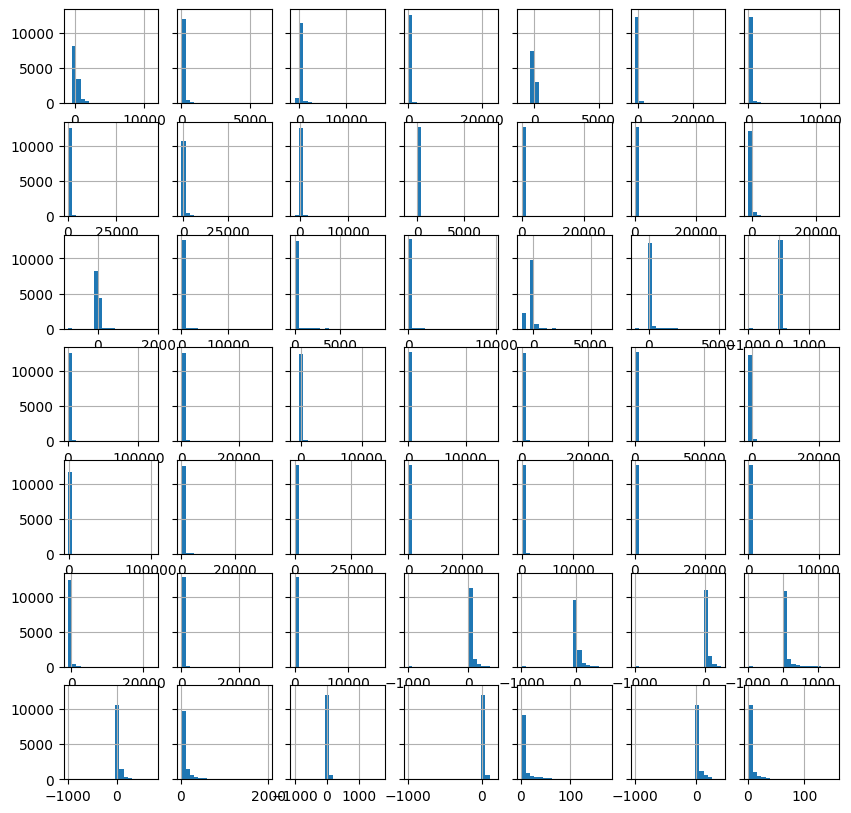

490


In [30]:
st = 441

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

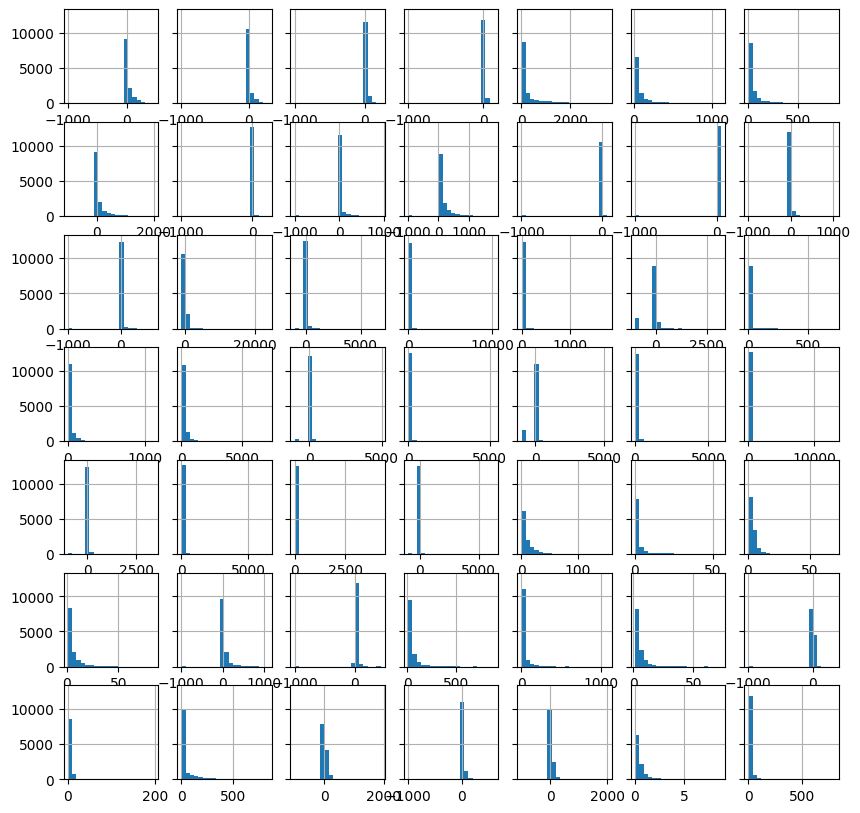

539


In [31]:
st = 490

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

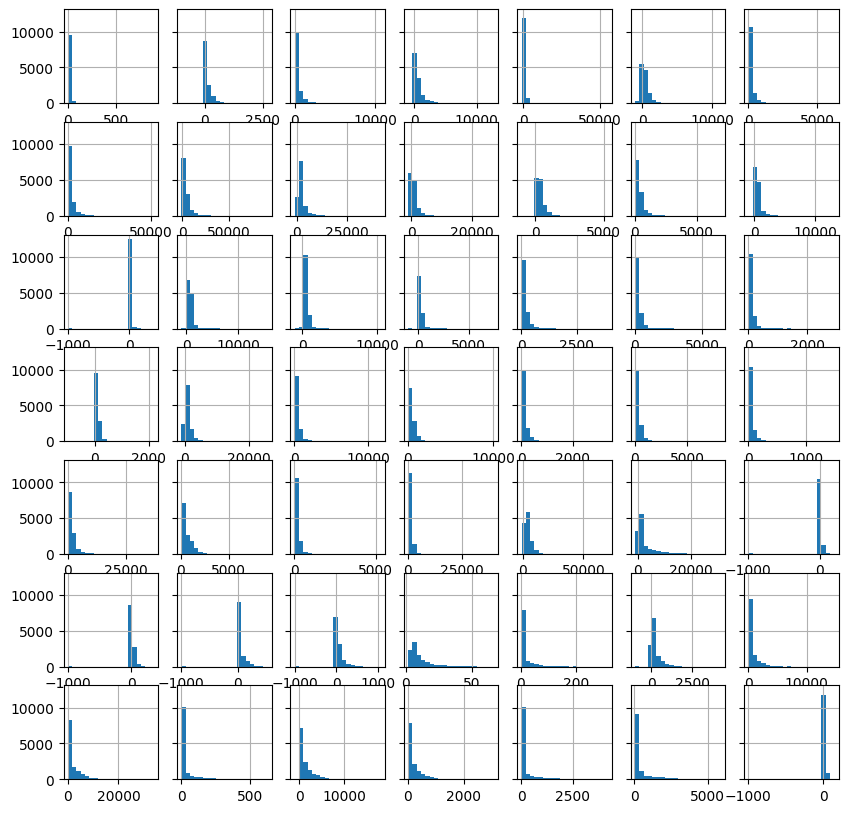

588


In [32]:
st = 539

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

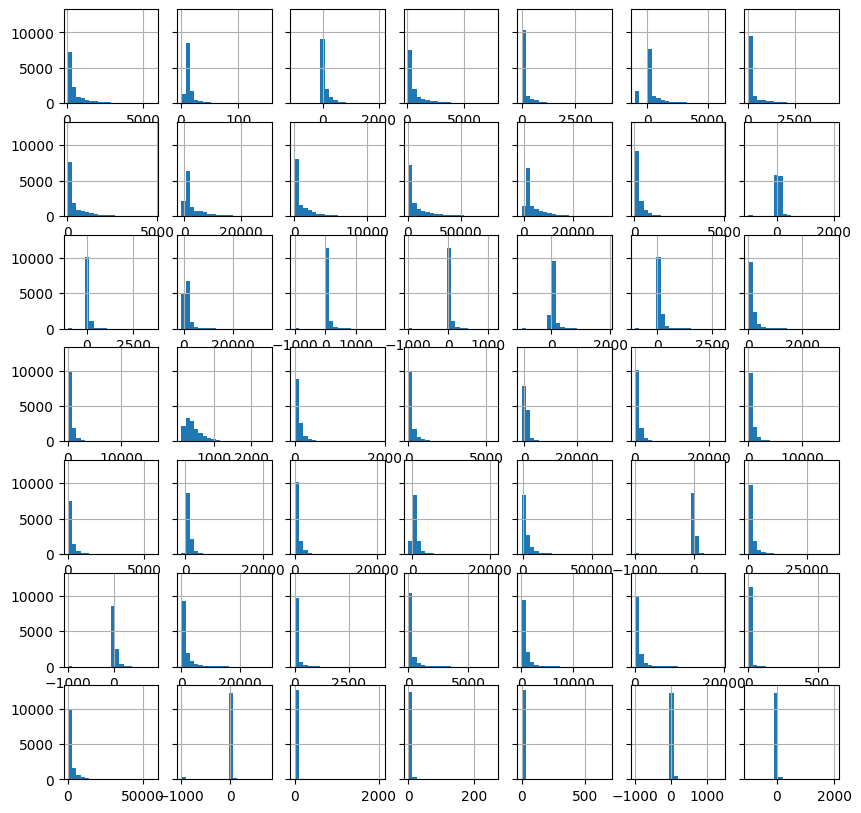

637


In [33]:
st = 588

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

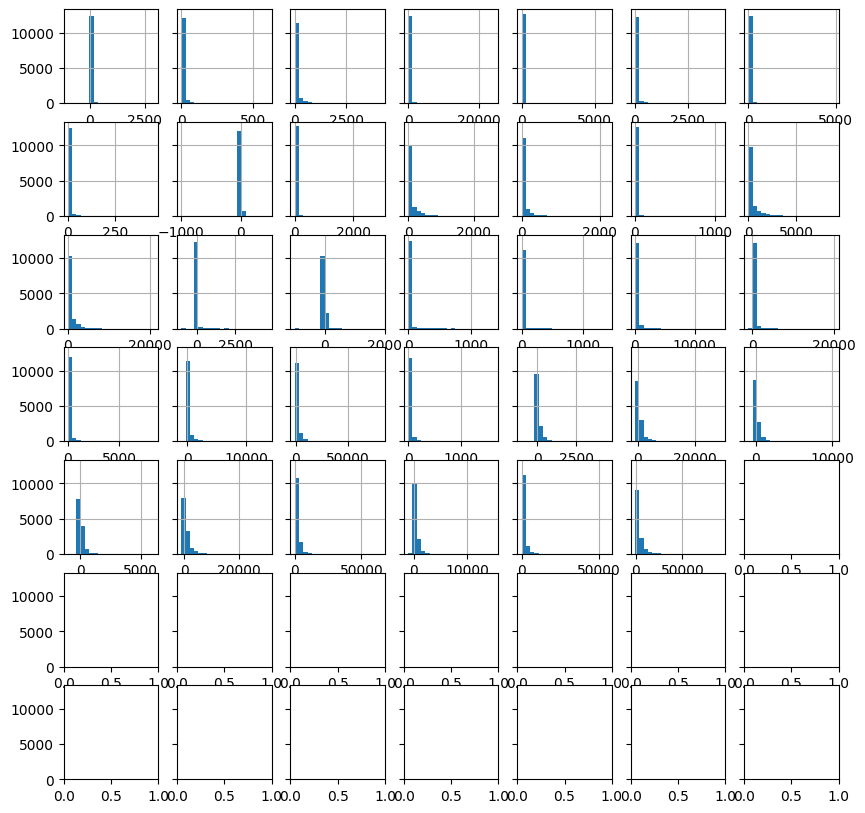

671


In [34]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = 637
for _, ax in enumerate(axes.flat):
    
    if idx >= 671:
        break

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

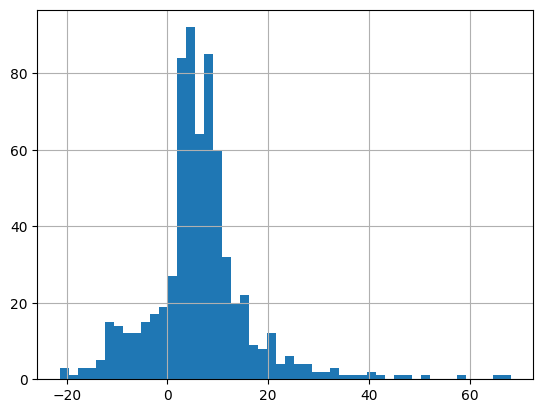

In [35]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### potential evapotranspiration

In [36]:
# pet = dataset.fetch(dynamic_features = 'pet', as_dataframe=True)
# pet = pet.reset_index()
# pet.index = pd.to_datetime(pet.pop('time'))
# pet.pop('dynamic_features')
# print(pet.shape) 
# EDA(data=pet, save=False).heatmap()

In [37]:
#_ = hist(pet.skew().values.reshape(-1,), bins=50)

#### Air Temperature

In [38]:
tmax = dataset.fetch(dynamic_features = 'tmax(C)', as_dataframe=True)
tmax = tmax.reset_index()
tmax.index = pd.to_datetime(tmax.pop('time'))
tmax.pop('dynamic_features') 
print(tmax.shape)

EDA(data=tmax, save=False).heatmap()

(12784, 671)


<AxesSubplot: ylabel='Examples'>

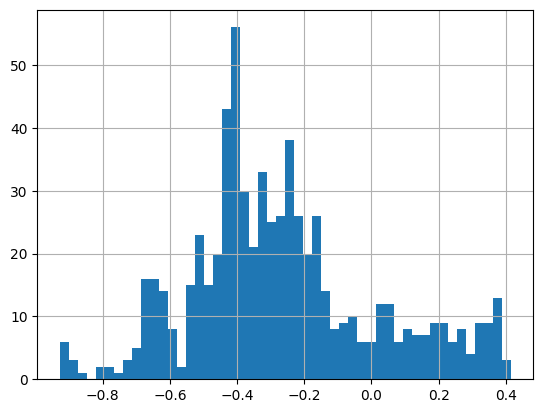

In [39]:

_ = hist(tmax.skew().values.reshape(-1,), bins=50)

In [40]:
tmin = dataset.fetch(dynamic_features = 'tmin(C)', as_dataframe=True)
tmin = tmin.reset_index()
tmin.index = pd.to_datetime(tmin.pop('time'))
tmin.pop('dynamic_features') 

print(tmin.shape)

EDA(data=tmin, save=False).heatmap()

(12784, 671)


<AxesSubplot: ylabel='Examples'>

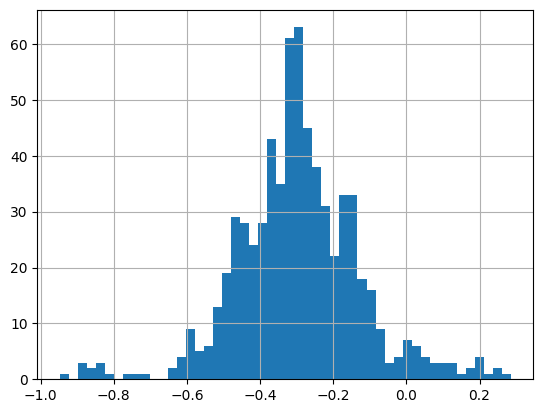

In [41]:
_ = hist(tmin.skew().values.reshape(-1,), bins=50)

In [45]:
temp = np.mean([tmax.values, tmin.values], axis=0)

temp = pd.DataFrame(temp, columns=tmax.columns, index=tmax.index)

print(temp.shape)

EDA(data=temp, save=False).heatmap()
#tmax.shape, tmin.shape

(12784, 671)


<AxesSubplot: ylabel='Examples'>

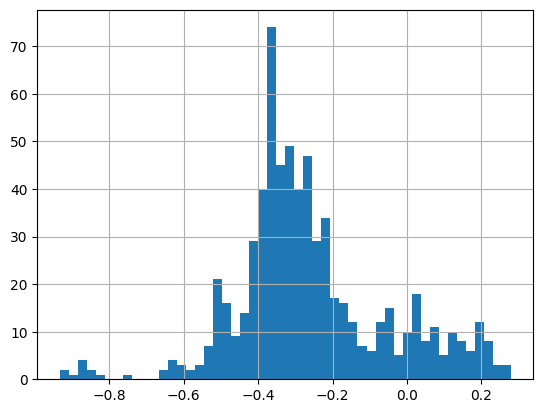

In [46]:
_ = hist(temp.skew().values.reshape(-1,), bins=50)

#### Precipitation


In [47]:
pcp = dataset.fetch(dynamic_features = "prcp(mm/day)", as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')

print(pcp.shape) 

_ = EDA(data=pcp, save=False).heatmap()

(12784, 671)


<AxesSubplot: ylabel='Examples'>

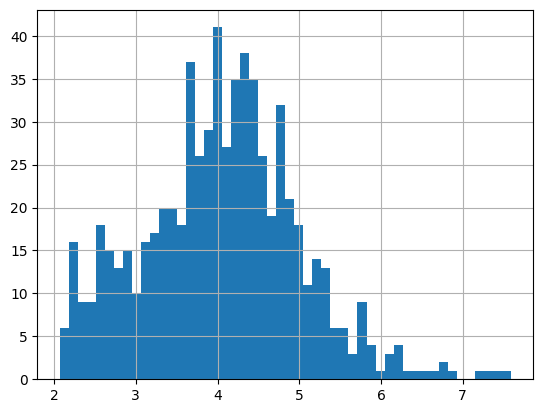

In [48]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)